<a href="https://colab.research.google.com/github/henrykohl/DeepLearningByPytorchTutorial/blob/master/video_notebooks/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">PyTorch Computer Vision ---</font>
* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libaries in PyTorch
* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

Lecture record
```
print(torch.__version__)
print(torchvision.__version__)
```
1.13.1+cu116

0.14.1+cu116

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [ ]:
# Check versions (2023時執行結果留存)
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting a dataset
The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset? (如果是train=True，有就是default設定，可以不用加)
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    # download=True,    # 如果train_data已先執行過download=True，這裡就不再需要
    transform=ToTensor(), # 或是 torchvision.transforms.ToTensor()
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.70MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.9MB/s]


```python
type(train_data),type(test_data)
```
(torchvision.datasets.mnist.FashionMNIST,

 torchvision.datasets.mnist.FashionMNIST)

 ```python
 len(train_data), len(test_data)
 ```
 (60000, 10000)


In [ ]:
# See the first training example
"""有transform=ToTensor(),則image是tensor,否則就是一個PIL.Image.Image物件,此外,tranform會把 [0到255]的值 轉換成 [0,1] """
image, label = train_data[0]

image.shape, label              #

(torch.Size([1, 28, 28]), 9)


```
type(image), type(label)
```
(torch.Tensor, int)


In [ ]:
"""類別名單"""
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
"""類別名單含index"""
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
"""train_data的標籤"""
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


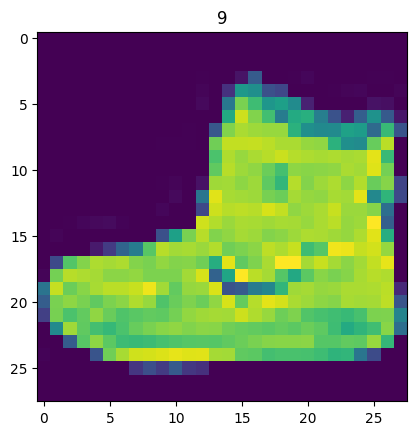

In [ ]:
import matplotlib.pyplot as plt # 可省略
image, label = train_data[0]
print(f"Image shape: {image.shape}")

"""畫彩色圖"""
plt.imshow(image.squeeze()) # squeeze()可以把image.shape從1*28*28改成28*28
# plt.imshow(image[0]) # 換個方式
# plt.imshow(image.permute(1,2,0)) # 再另個方式
plt.title(label);
# image # 測試用

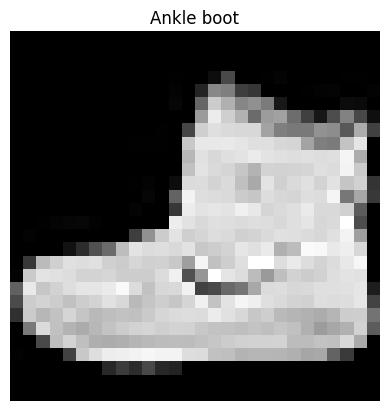

In [ ]:
"""畫黑白圖"""
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

產生亂數的方法之一
```python
torch.randint(0, 10, size=[2]).numpy()
```

產生亂數的方法又一
```python
from random import sample
temp=sample(range(10), k=1)
type(temp),temp
```
(list, [9])


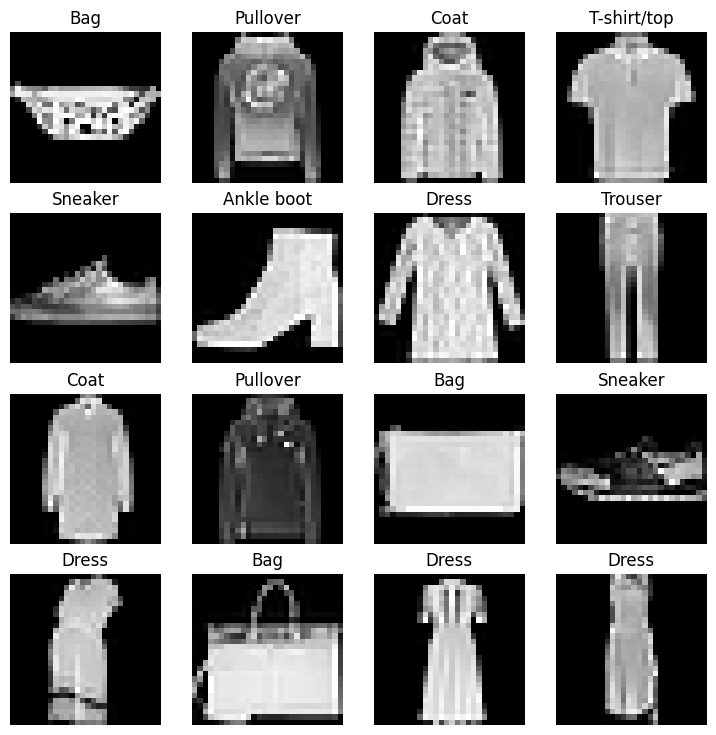

In [ ]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item() # size=[...] 好像不能 size=...
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)  #參數意思是將畫布分割成rows行cols列，圖像在從左到右從上到下的第i块。
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                 batch_size=BATCH_SIZE,
                 shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                batch_size=BATCH_SIZE,
                shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b017398cc90>,
 <torch.utils.data.dataloader.DataLoader at 0x7b017406b110>)

In [ ]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb3d8d43e50>, <torch.utils.data.dataloader.DataLoader object at 0x7fb3d90b7bb0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


驗證上面 1875 batches 與 313 batches

```
60000/32,10000/32
```
(1875.0, 312.5)


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

* 如果寫成 `next(enumerate(train_dataloader))`

```python
index_train_data_batch, train_data_batch = next(enumerate(train_dataloader))
type(index_train_data_batch), type(train_data_batch) # 結果是(int, list)

index_train_data_batch # enumerate賦予的index id
train_data_batch    # 是list類型，可拆解成兩項

tb_features, tb_labels = train_data_batch
tb_features # 就是 train_features_batch
tb_labels  # 就是 train_labels_batch
```

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


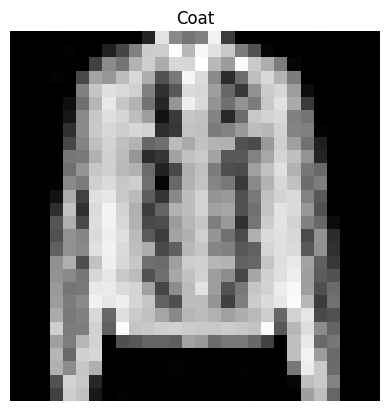

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## <font color="red">3. Model 0: Build a basline model</font>
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() ## flatten會把dim=1到dim=-1，成為一個single vector

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
        input_shape: int,
        hidden_units: int,
        output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # 沒有flatten會出錯，因為flatten會把dim=1到dim=-1，成為一個single vector

        nn.Linear(in_features=input_shape,
             out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
             out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28 (沒用nn.Flatter()，input_shape設成28後，見model_0(dummy_x).shape可知問題所在)
    hidden_units=10, # how mnay units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)


```python
model_0.layer_stack
```

Sequential(

  (0): Flatten(start_dim=1, end_dim=-1)

  (1): Linear(in_features=784, out_features=10, bias=True)

  (2): Linear(in_features=10, out_features=10, bias=True)

)


```python
model_0.layer_stack.parameters()
```
<generator object Module.parameters at 0x7f965ea2f120>


In [ ]:
# (新增) model_0.layer_stack是 Sequential object，用iter轉換成iterator object
itml = iter(model_0.layer_stack)

In [ ]:
# (新增)
flatten0 = next(itml)

In [ ]:
# (新增)
layer1 = next(itml)
layer1.weight, layer1.bias, layer1.weight.shape, layer1.bias.shape

(Parameter containing:
 tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
         [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
         [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
         ...,
         [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
         [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
         [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
          0.0018,  0.0163], requires_grad=True),
 torch.Size([10, 784]),
 torch.Size([10]))

In [ ]:
# (新增)
layer2 = next(itml)
layer2.weight, layer2.bias, layer2.weight.shape, layer2.bias.shape

(Parameter containing:
 tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
           0.2019,  0.2847],
         [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,
           0.0932, -0.1864],
         [ 0.2488,  0.1500,  0.1907,  0.1457, -0.3050, -0.0580,  0.1643,  0.1565,
          -0.2877, -0.1792],
         [ 0.2305, -0.2618,  0.2397, -0.0610,  0.0232,  0.1542,  0.0851, -0.2027,
           0.1030, -0.2715],
         [-0.1596, -0.0555, -0.0633,  0.2302, -0.1726,  0.2654,  0.1473,  0.1029,
           0.2252, -0.2160],
         [-0.2725,  0.0118,  0.1559,  0.1596,  0.0132,  0.3024,  0.1124,  0.1366,
          -0.1533,  0.0965],
         [-0.1184, -0.2555, -0.2057, -0.1909, -0.0477, -0.1324,  0.2905,  0.1307,
          -0.2629,  0.0133],
         [ 0.2727, -0.0127,  0.0513,  0.0863, -0.1043, -0.2047, -0.1185, -0.0825,
           0.2488, -0.2571],
         [ 0.0425, -0.1209, -0.0336, -0.0281, -0.1227,  0.0730,  0.0747, -0.1816,
       

* (case1) 測試model_0。輸入[1, 1, 28, 28]，輸出[1,10]

```python
torch.manual_seed(42)
dummy_x = torch.rand([1, 1, 28, 28])
#nn.Flatten()會把[1, 1, 28, 28]的shape，轉成[1, 1*28*28]
out_x0 = model_0(dummy_x) # 輸出10個值，而shape為[1,10]
out_x0, out_x0.shape
```

* (case2)測試model_0。輸入[ 1, 28, 28]，輸出[1,10]

```python
torch.manual_seed(42)
dummy_d = torch.rand([1, 28, 28])
#nn.Flatten()會把[1, 28, 28]的shape，轉成[1, 28*28]
out_d0 = model_0(dummy_d) # 輸出"依然是"10個值，而shape為[1,10]
out_d0, out_d0.shape
```

* (case3)測試model_0。輸入[1, 28, 28]轉成[1, 1, 28, 28]，輸出[1,10]

```python
out_d0 = model_0(dummy_d.unsqueeze(0))
out_d0, out_d0.shape
```

* (case4-1)如果輸入是 3維(且第一維不是1)，不是4維，而且使用unsqueeze()，則會出現錯誤

```python
torch.manual_seed(42)

dummy_3c = torch.rand([3, 28, 28])
out_3c = model_0(dummy_3c.unsqueeze(0))
```

* (case4-2)如果輸入是 4維，第二維不是1，則會出現錯誤

```python
dummy_3c = torch.rand([1, 3, 28, 28])
out_3c = model_0(dummy_3c)
```


> case4-1 or case4-2 在pass through model_0的nn.Flatten()後，output的shape是 1 x 3 * 28 * 28
>
> 3 * 28 * 28與nn.Linear的input大小28*28想比，明顯不相等，所以會出現錯誤
>
> 修正方法是將model_0中的nn.Flatten()改成nn.Flatten(start_dim=2, end_dim=-1)。也就把從第2維度到最後維度扁平化成一個single vector


In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics
* Loss function - since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer - our optimizer torch.optim.SGD() (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  # request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/henrykohl/DeepLearningByPytorchTutorial/master/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

* 可以使用 `wget` 下載 helper_functions.py

```bash
!wget https://raw.githubusercontent.com/henrykohl/DeepLearningByPytorchTutorial/master/helper_functions.py -O hfs.py
```

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() ## 也可以使用 F.cross_entropy
optimizer = torch.optim.SGD(params=model_0.parameters(),
                lr=0.1)

In [ ]:
# accuracy_fn() # 查看document，不用執行

In [ ]:
# 新增
# import torch.nn.functional as F
# loss_fn_F = F.cross_entropy

<font color="red"> 注意這裡有個Pytorch的小細節

```python
temptensor = torch.tensor([1,3,5])


"""以下兩種方式，均是取出tensor中的第一個位置的值，但輸出結果不完全一樣"""
temptensor[0], temptensor[0:1]
```
(tensor(1), tensor([1]))

* 示範計算單一張圖的loss_fn

```python
temp_batch = next(iter(train_dataloader))
temp_batch_images, temp_batch_labels = temp_batch

pred = model_0(temp_batch_images[0]) ## 取 batch 中的第一張圖
```



```python
loss_fn(pred,temp_batch_labels[0])  # 錯誤
loss_fn(pred[0],temp_batch_labels[0]) # 正確
loss_fn(pred,temp_batch_labels[0:1]) # 正確
```

<font color="red">上面計算 loss 第一個寫法是錯誤的, 原因就是上述提到關於pytorch的小細節
> pred.shape 是 [1,10]
>
> temp_batch_labels[0].shape 是 (1)
>
> temp_batch_labels[0:1].shape 是  [1]



### 3.2 Creating a function to time our experiments
Machine learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
            end: float,
            device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.5749000239302404e-05

### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).
**Note:** Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.


```python
for batch, (X, y) in enumerate(train_dataloader):
```

與

```python
for X, y in train_dataloader:
```

相比，X與y的效果是一樣的，batch是0,1,2,3,...，enumerate的功能就是標註train_dataloader中批次的index為batch
```python
len(train_dataloader)
```
1875

```python
len(train_dataloader.dataset)
```
60000



In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader): # X就是image資料，y則是label
    """ *訓練模式* """
    model_0.train()
    # 1. Forward pass
    """步驟1 - 預測(X:[32, 1, 28, 28], y_pred:[32, 10])"""
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    """步驟2 - 計算loss (y_pred是input, y是target:[32])"""
    loss = loss_fn(y_pred, y) # 也可用 F.cross_entropy（y_pred, y），不需實例化直接計算 loss
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    """步驟3 - 優化器歸零"""
    optimizer.zero_grad()

    # 4. Loss backward
    """步驟4 - 反向傳播"""
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    """步驟5 - 優化器更新"""
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  """平均每個batch的train_loss為多少"""
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0

  """ *評估模式* """
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      """步驟1 - 預測 (X_test:[32, 1, 28, 28], test_pred:[32, 10])"""
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      """步驟2 - 計算loss (test_pred是預測標籤, y_test是真實標籤:[32])"""
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      """步驟3 - 計算accuracy(真實標籤在前 預測標籤在後)"""
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    """平均每個batch的test_loss為多少"""
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    """平均每個batch的test_acc為多少"""
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                        end=train_time_end_on_cpu,
                        device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 41.947 seconds


* 注意，`步驟3 - 優化器歸零` 可以移至 `步驟4 - 反向傳播` 與 `步驟5 - 優化器更新` 之後才執行。

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get Model 0 results

* 注意此eval_model()在CPU運行時, 沒有問題, 但在GPU時會出現錯誤(沒有使用.to(device)), 後面會有修正版的eval_model

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  """ *評估模式* """
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      """步驟1 - 預測 (X:[32, 1, 28, 28], y_pred:[32, 10])"""
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      """步驟2 - 計算loss"""
      loss += loss_fn(y_pred, y)
      """步驟3 - 計算accuracy (y: [32])"""
      acc += accuracy_fn(y_true=y,
                 y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    """平均每個batch的loss(純量tensor)為多少"""
    loss /= len(data_loader)
    """平均每個batch的acc(純量)為多少"""
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
# 要先開啟GPU
# !nvidia-smi

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity
We learned about the power of non-linearity in notebook 02 - https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
          input_shape: int,
          hidden_units: int,
          output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(), # flatten inputs into a single vector
      nn.Linear(in_features=input_shape,
           out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,
           out_features=output_shape),
      nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                  hidden_units=10,
                  output_shape=len(class_names)).to(device) # send to the GPU if it's available
"""注意刮號的位置，不是len(???).to(device)，而是FashionMNISTModelV1().to(device)"""

next(model_1.parameters()).device


device(type='cpu')

```python
model_1.parameters()
## generator
next(model_1.parameters())
## torch.nn.parameter.Parameter
```

In [ ]:
# !nvidia-smi

* 測試model_1。

```python
torch.manual_seed(42)

# 輸入[1, 1, 28, 28]，輸出[1,10]
dummy_x = torch.rand([1, 1, 28, 28])
model_1(dummy_x) # 輸出10個值，而shape為[1,10]

# 輸入[1, 28, 28]，輸出[1,10]
dummy_x = torch.rand([1, 28, 28])
model_1(dummy_x) # 輸出10個值，而shape為[1,10]

# 輸入[1, 28, 28]轉成[1, 1, 28, 28]，輸出[1,10]
dummy_x = torch.rand([1, 28, 28])
model_1(dummy_x.unsqueeze(0)) # 輸出10個值，而shape為[1,10]
```

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                lr=0.1)

NameError: name 'model_1' is not defined

### 6.2 Functionizing training and evaluation/testing loops
Let's create a function for:

* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
# for Xt, yt in train_dataloader:
#   Xt, yt = Xt.to(device), yt.to(device)
#   break;
# y_pred_t = model_1(Xt)
# Xt.shape, yt.shape

In [ ]:
# Xt.device

In [ ]:
# y_pred_t.device

In [ ]:
# next(model_1.parameters()).device

In [ ]:
# loss_fn的output存在於GPU上
# tt = loss_fn(y_pred_t,yt)
# tt

<font color="red">將 **3.2 Create training and test loop** 分開成 **兩個functions**

In [ ]:
def train_step(model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  """ *訓練模式* """
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    """步驟1 - 預測"""
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    """步驟2 - 計算loss (input在前 target在後); 含計算accuracy (真實在前 預測在後)"""
    loss = loss_fn(y_pred, y) # pytorch自帶的loss_fn，不需要再手動將其移到GPU
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                  y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    """步驟3 - 優化器歸零"""
    optimizer.zero_grad()

    # 4. Loss backward
    """步驟4 - 反向傳播"""
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    """步驟5 - 優化器更新"""
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  """平均每個batch的train_loss,train_acc為多少"""
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  """ *評估模式* """
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      """置放資料於設備"""
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      """步驟1 - 預測"""
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      """步驟2 - 計算loss (預測標籤在前 真實標籤在後); 含計算accuracy (真實在前 預測在後)"""
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    """平均每個batch的test_loss,test_acc為多少"""
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
  test_step(model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                         end=train_time_end_on_gpu,
                         device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 42.880 seconds


In [ ]:
# device

> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [ ]:
"""回顧4.的model_0_results"""
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
"""回顧4.的total_train_time_model_0"""
# Train time on CPU
total_train_time_model_0

41.94713218299967

In [ ]:
# Get model_1 results dictionary (錯誤示範，開啟GPU時，模型在GPU，但資料卻還在CPU)

# model_1_results = eval_model(model=model_1,
#                 data_loader=test_dataloader,
#                 loss_fn=loss_fn,
#                 accuracy_fn=accuracy_fn)
# model_1_results

* 4.0 中 `eval_model`  不可用於 GPU開啟時，以下為修改後的 `eval_model`可用於 GPU
> 主要就是新增
>
> ```python
> X, y = X.to(device), y.to(device)
> ```
>
> 目的是，將資料置放於正確裝置上

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0

  model.eval()
  """ *評估模式* """
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      """資料置放於正確裝置上"""
      X, y = X.to(device), y.to(device)
      # Make predictions
      """步驟1 - 預測"""
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      """步驟2 - 計算loss; 計算accuracy"""
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                 y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    """平均每個batch的loss為多少"""
    loss /= len(data_loader)
    """平均每個batch的acc為多少"""
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
       "model_loss": loss.item(),
       "model_acc": acc}

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
# 與model_0比較
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

<font color="red">**model_1**的結果似乎沒有比**model_0**來得好

## Model 2: Building a Convolutional Neural Network (CNN)
CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    """
    in: (4維) batch_size x 1 x 28 x 28
    in: (3維)         1 x 28 x 28   (self.classifier需要修改)
    """
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1), # values we can set ourselves in our NN's are called hyperparameters
      ## |28 + 2*padding - kernel_size|/stride + 1 = 28
      # out: (batch_size) x hidden_units x 28 x 28
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      ## |28 + 2*padding - kernel_size|/stride + 1 = 28
      # out: (batch_size) x hidden_units x 28 x 28
      nn.MaxPool2d(kernel_size=2) # default stride value is same as kernel_size
      ## 28 / 2 = 14
      # out: (batch_size) x hidden_units x 14 x 14
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      ## |14 + 2*padding - kernel_size|/stride + 1 = 14
      # out: (batch_size) x hidden_units x 14 x 14
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      ## |14 + 2*padding - kernel_size|/stride + 1 = 14
      # out: (batch_size) x hidden_units x 14 x 14
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2) # default stride value is same as kernel_size
      ## 14 / 2 = 7
      # "out: (batch_size) x hidden_units x 7 x 7
    )
    self.classifier = nn.Sequential(

      nn.Flatten(),  # 輸入為4維(e.g., [a,b,c,d])的話，輸出為[a, b*c*d]
      ## out: (batch_size) x hidden_units x 7 x 7

      # nn.Flatten(0,-1), # 輸入為3維(e.g., [e,f,g])的話，輸出為[e*f*g]
      ## out: hidden_units x 7 x 7

      nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...
            out_features=output_shape)

      # out: (batch_size) x output_shape
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
len(class_names)

10

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                hidden_units=10,
                output_shape=len(class_names)).to(device)

* 測試 model_2

```python
torch.manual_seed(42)
# 輸入[1, 1, 28, 28]，輸出[1,10]
dummy_x = torch.rand([1, 1, 28, 28])

"""classifier的輸入為 torch.Size([1, 10, 7, 7])"""
model_2(dummy_x).shape # 最後輸出10個值，而shape為[1,10]
```

* (錯誤範例)測試 model_2

```python
# 輸入[1, 28, 28]，輸出會出錯
torch.manual_seed(42)
dummy_d = torch.rand([1, 28, 28])

# """classifier的輸入為 torch.Size([10, 7, 7])"""
model_2(dummy_d).shape
"""錯誤訊息為 RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 490x10)"""
```

* 正確方式

```python
# 輸入[1, 28, 28]轉成[1, 1, 28, 28]，輸出[1,10]
model_2(dummy_d.unsqueeze(0))
```

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
outu_2 = model_2(rand_image_tensor.unsqueeze(0).to(device))
outu_2.shape

torch.Size([1, 10])

* `class FashionMNISTModelV2(nn.Module)` 中的第57行，如果改成
```python
nn.Linear(in_features=hidden_units, out_features=output_shape)
```
會有趣的錯誤發生

* 如果不使用unsqueeze，輸入3維
```python
out_2 = model_2(rand_image_tensor.to(device))
out_2.shape # 注意輸出維度，與上面有所不同
```

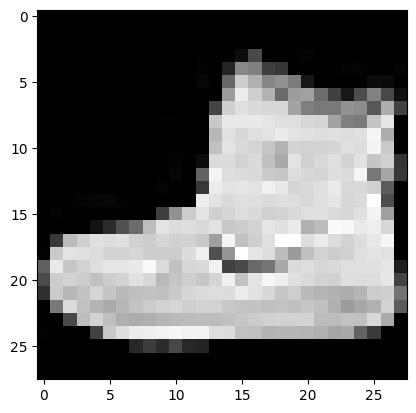

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
# model_2.state_dict()

### 7.1 Stepping through nn.Conv2d()
See the documentation for nn.Conv2d() here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
"""解釋 nn.Conv2d() 做了哪些事"""
torch.manual_seed(42)

# Create a batch of images
"""手動產生32個image，每一個有3個channels，每一個channel：64 x 64"""
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
#test_image.shape

In [ ]:
torch.manual_seed(42)
# Create a sinlge conv2d layer
"""in: batch_szie x 3 x 64 x 64"""
conv_layer = nn.Conv2d(in_channels=3,
            out_channels=10,
            kernel_size=(3, 3),
            stride=1,
            padding=0)
"""out: batch_szie x 10 x 62 x 62       因為 (64+2*0-3)/1 + 1 = 62"""

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))

"""如果沒有使用.unsqueeze(0)，結果就變成torch.Size([10, 62, 62])注意 torch.version在 1.11以上(含)就不會有錯誤"""
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
# test_image.unsqueeze(0).shape

### 7.2 Stepping through nn.MaxPool2d()
https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
  test_step(model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                        end=train_time_end_model_2,
                        device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99%

Epoch: 1
-------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91%

Epoch: 2
-------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07%

Train time on cpu: 170.817 seconds


In [ ]:
# !nvidia-smi

In [ ]:
# Get model_2 results
model_2_results = eval_model(
  model=model_2,
  data_loader=test_dataloader,
  loss_fn=loss_fn,
  accuracy_fn=accuracy_fn,
  device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time <font color="red">使用DataFrame</font>

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,  # 沒有ReLU    (CPU)
                                model_1_results,  #  有ReLU    (GPU)
                                model_2_results]) # CNN + 有ReLU  (GPU)
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,  # (CPU)
                                    total_train_time_model_1,  # (GPU)
                                    total_train_time_model_2]  # (GPU)
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,41.947132
1,FashionMNISTModelV1,0.685001,75.019968,42.879816
2,FashionMNISTModelV2,0.327190,88.069089,170.816910


In [ ]:
# type(compare_results.set_index("model_name")["model_acc"])

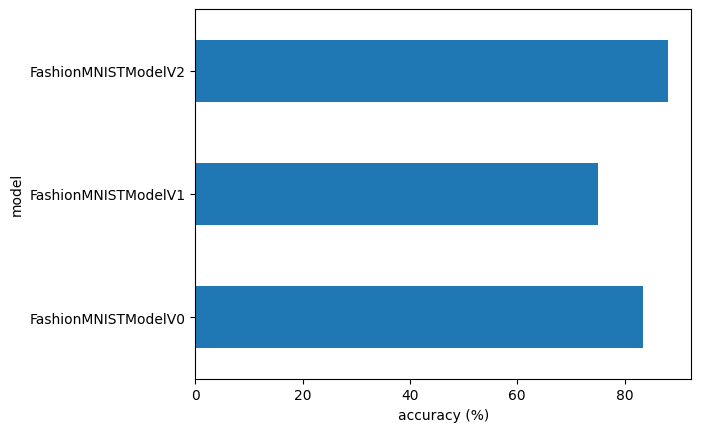

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh") # 可以用plot(kind="bar")畫出不同的樣式
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                    data: list, ## a list of torch.Tensor
                    device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      """輸入sampel.shape為[1, 28, 28]"""
      # Prepare the sample (add a batch dimension and pass to target device)
      """將sampel.shape轉為[1, 1, 28, 28]並置放於正確裝置"""
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      """預測"""
      pred_logit = model(sample)                 #pred_logit.shape為[1, 10]

      # Get prediction probability (logit -> prediction probability)
      """用softmax處理"""
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) #pred_prob.shape為[10]

      # Get pred_prob off the GPU for further calculations
      """新增結果"""
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor

  # return pred_probs # [tensor([10個值]),tensor([10個值]),...]
  return torch.stack(pred_probs) # 把list轉成torch.Tensor：tensor([[10個值],[10個值],...])


In [ ]:
# test_data

<font color="red">備註</font>

test_data是Dataset FashionMNIST

dset2 = list(test_data)

t2 = dset2[:2] 建一個list只含2比資料

窮舉的方式：
* for a, b in list(test_data):

* for a, b in iter(list(test_data)):

In [ ]:
# img, label = test_data[0][:10] # 還不太瞭解[:10]在此的作用
# img.shape

```
type(test_data)
```
torchvision.datasets.mnist.FashionMNIST


In [ ]:
"""從test_data任取9筆資料"""
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

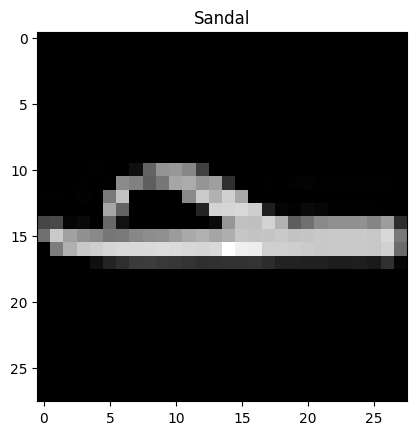

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
"""也可以寫成"""
# plt.imshow(test_samples[0].permute(1, 2, 0), cmap="gray")

plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                 data=test_samples)

# View first two prediction probabilities
"""pred_prob中每一個tensor的shape為[10]"""
pred_probs[:2]

tensor([[2.8262e-05, 2.3906e-06, 3.6895e-05, 1.5043e-03, 1.3037e-06, 9.9017e-01,
         4.9643e-06, 4.6917e-03, 3.5534e-03, 3.7860e-06],
        [9.1293e-01, 9.3568e-06, 3.5946e-03, 1.3454e-03, 8.1465e-04, 7.1903e-07,
         8.0991e-02, 1.6199e-06, 3.1075e-04, 7.6820e-08]])

In [ ]:
# Convert prediction probabilities to labels
"""如果model_2的回傳是return pred_probs，不是return torch.stack(pred_probs)，也可以用第二個方法得到pred_classes"""
pred_classes = pred_probs.argmax(dim=1)
pred_classes


# list_probs=[]
# for sg in pred_probs:
#   list_probs.append(sg.argmax(dim=0))

# torch.stack(list_probs)


tensor([5, 0, 0, 8, 4, 8, 8, 0, 7])

In [ ]:
"""真實標籤"""
test_labels

[5, 0, 6, 8, 4, 8, 8, 0, 7]

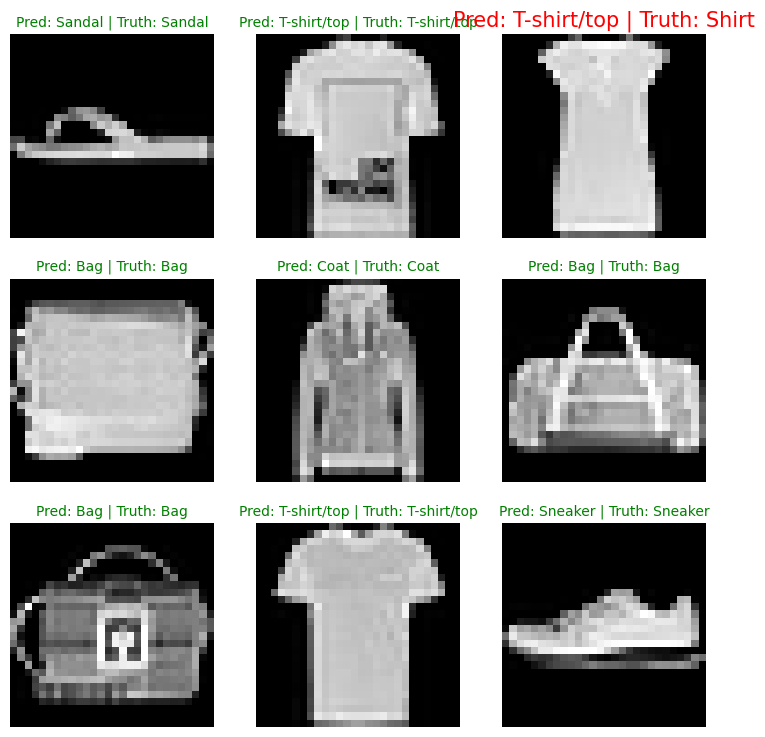

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")  # sample的shape為[1,28,28],sample.squeeze()的shape為[1,28,28]

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=15, c="r") # fontsize原本是10

  plt.axis(False);

In [ ]:
sample.shape

torch.Size([1, 28, 28])

## 10. Making a confusion matrix for further prediction evaluation
A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
import mlxtend

```
mlxtend.__version__
```
0.21.0


In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)   # y_logit的shape是[32,10]
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    # y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1) # (y_logit的shape是[32,10],y_logit.squeeze()完全等於y_logit，所以squeeze是不需要的

    y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1) # 上一行應該用此行取代吧？！

    # y_pred = y_logit.argmax(dim=1) # 這裡不一定要用softmax，可以直接用argmax，因為沒有要計算loss

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor



Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

<font color="red">注意 **torch.cat** 與 **torch.stack** 之間的差異

```
torch.stack(y_preds[:2])
```


```
torch.cat(y_preds[:2])
```




In [ ]:
# y_pred_tensor[:10]

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# colab沒有安裝torchmetrics 因此以下無法直接執行
# import torchmetrics

In [ ]:
# mlxtend.__version__.split(".")[1]

'14'

* 示範 `assert` 用法
```bash
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
```

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher") # 原作者這樣寫，應該是錯的，要像上一個cell裡的寫法
except:
  !pip install torchmetrics -U mlxtend  --quiet # U是update的意思
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 877.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# import mlxtend
# print(mlxtend.__version__)
mlxtend.__version__

'0.23.4'

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# test_data中的label項
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

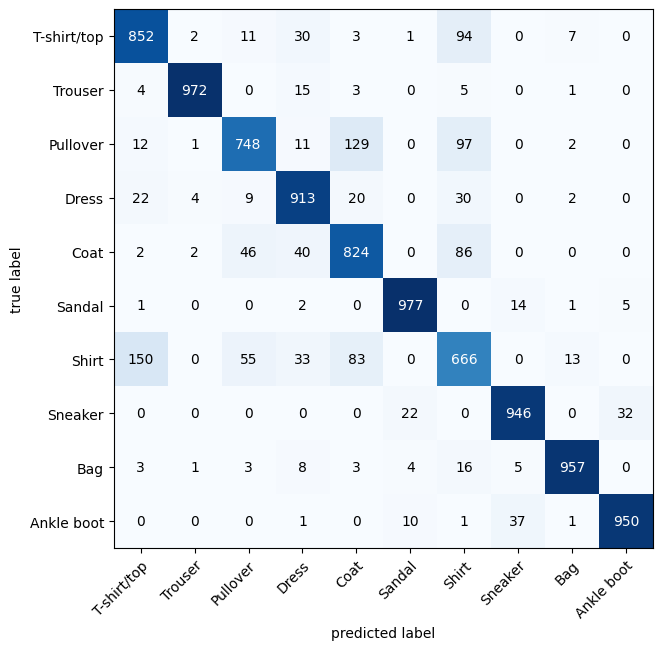

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
"""新版的torchmetrics, 在ConfusionMatrix需要加入task="multiclass"""
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
              target=test_data.targets)

# 3. Plot the confusion matrix
"""fig, ax不是必要的"""
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

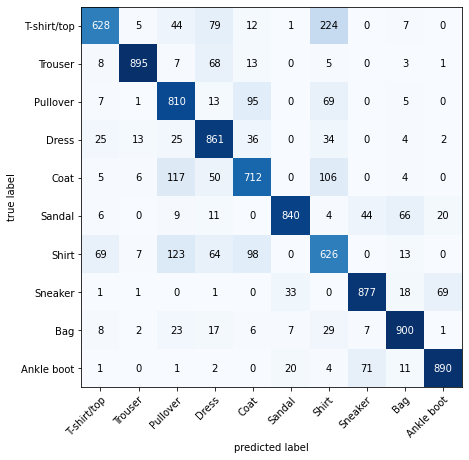

In [ ]:
# 原版結果

In [ ]:
# confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

## 11. Save and load best performing model

In [ ]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
         exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
      f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# image_shape = [1, 28, 28]

In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_names)) # 或是直接output_shape=10

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
       torch.tensor(loaded_model_2_results["model_loss"]),
       atol=1e-012) # We can adjust the absolute tolerance level

tensor(True)

In [ ]:
loaded_model_2_results["model_loss"]

0.32718968391418457

## Exercises
* See here for exercises and extra-curriculum: https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises